# Bone Fracture Classification
##### Dataset Link - https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project
#### Xception
#### ResNet152V2
#### InceptionResnetV2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import joblib
%matplotlib inline

In [ ]:
TRAINING_PATH = "/content/drive/MyDrive/bone fracture detection1/train_output"
TESTING_PATH = "/content/drive/MyDrive/bone fracture detection1/test_output"

In [ ]:
training_images = []
training_labels = []

In [ ]:
for i in os.listdir(TRAINING_PATH):
  class_name = i
  class_path = os.path.join(TRAINING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path = os.path.join(class_path, j)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (256,256))
    training_images.append(img_resized)
    training_labels.append(class_name)

for i in os.listdir(TESTING_PATH):
  class_name = i
  class_path = os.path.join(TESTING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path = os.path.join(class_path, j)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (256,256))
    training_images.append(img_resized)
    training_labels.append(class_name)

In [ ]:
training_images = np.array(training_images)
training_labels = np.array(training_labels)

In [ ]:
print(training_images.shape)
print(training_labels.shape)

(1887, 256, 256, 3)
(1887,)


In [ ]:
training_images = training_images / 255.0

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(training_images, training_labels, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=6)

In [ ]:
del training_images
del training_labels

## Xception

In [ ]:
xception = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
    pooling="avg",
    classes=6,
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in xception.layers:
  layer.trainable = False

In [ ]:
model_0 = tf.keras.models.Sequential()
model_0.add(xception)

model_0.add(tf.keras.layers.Flatten())
model_0.add(tf.keras.layers.Dropout(0.5))
model_0.add(tf.keras.layers.Dense(6, activation="softmax"))

In [ ]:
model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
history = model_0.fit(
    x_train,
    y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 10
)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 630s 15s/step - accuracy: 0.3230 - loss: 1.6629 - val_accuracy: 0.6067 - val_loss: 1.2429
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 644s 14s/step - accuracy: 0.6277 - loss: 1.1489 - val_accuracy: 0.6808 - val_loss: 1.0067
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 643s 15s/step - accuracy: 0.6954 - loss: 0.9526 - val_accuracy: 0.6984 - val_loss: 0.9232
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 622s 15s/step - accuracy: 0.7184 - loss: 0.8460 - val_accuracy: 0.7302 - val_loss: 0.8344
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 619s 15s/step - accuracy: 0.7585 - loss: 0.7734 - val_accuracy: 0.7496 - val_loss: 0.7831
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 625s 15s/step - accuracy: 0.7720 - loss: 0.7039 - val_accuracy: 0.7549 - val_loss: 0.7555
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 615s 15s/step - accuracy: 0.7823 - loss: 0.6618 - val_accuracy: 0.7619 - val_loss: 0.7274
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 579s 14s/step - accuracy: 0.8034 - loss: 0.6361 - val_accuracy: 0.

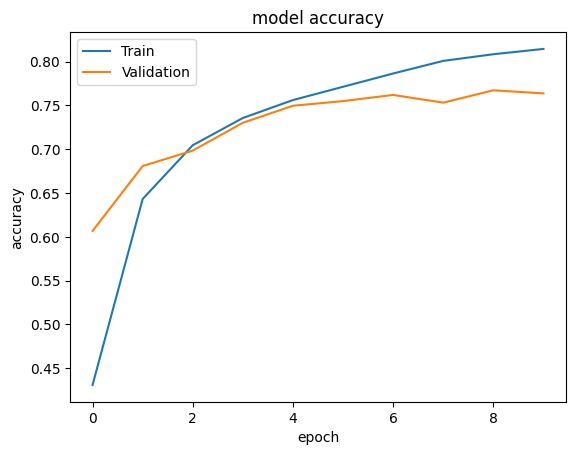

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("xception_without_data_augmentation_accuracy.png")
plt.show()

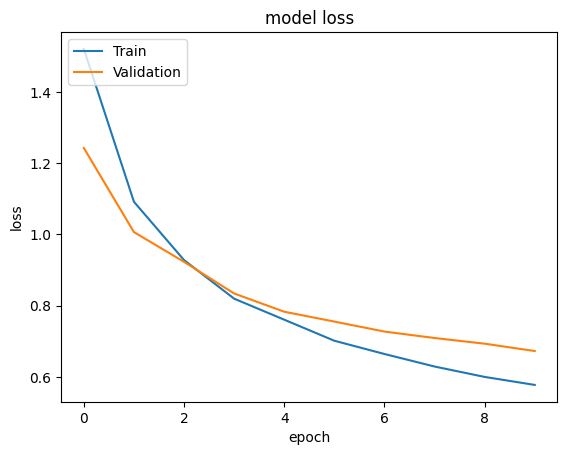

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("xception_without_data_augmentation_loss.png")
plt.show()

In [ ]:
model_0.save("xception_without_data_augumentation.h5")

In [ ]:
import os

# Define the folder where you want to save the model
save_dir = "/content/drive/MyDrive/bone fracture detection1/models"

# Create the folder if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model to the specified folder
model_path = os.path.join(save_dir, "xception_without_data_augmentation.h5")
model_0.save(model_path)


In [ ]:
del model_0

In [ ]:
del xception

## Resnet152V2

In [ ]:
resnet152v2 = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
    pooling="avg",
    classes=6,
)

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
for layer in resnet152v2.layers:
  layer.trainable = False

In [ ]:
model_2 = tf.keras.models.Sequential()
model_2.add(resnet152v2)

model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Dense(256,kernel_initializer='he_uniform'))
model_2.add(tf.keras.layers.Dropout(0.4))
model_2.add(tf.keras.layers.Dense(6, activation="softmax"))

In [ ]:
model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
history = model_2.fit(
    x_train,
    y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 10
)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1308s 31s/step - accuracy: 0.4189 - loss: 2.1500 - val_accuracy: 0.7989 - val_loss: 0.6840
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1249s 30s/step - accuracy: 0.7437 - loss: 0.8307 - val_accuracy: 0.7690 - val_loss: 0.6811
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1293s 30s/step - accuracy: 0.8047 - loss: 0.5832 - val_accuracy: 0.8430 - val_loss: 0.4756
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1269s 30s/step - accuracy: 0.7886 - loss: 0.6491 - val_accuracy: 0.8219 - val_loss: 0.6264
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1296s 30s/step - accuracy: 0.8355 - loss: 0.5431 - val_accuracy: 0.8801 - val_loss: 0.4014
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1278s 30s/step - accuracy: 0.8725 - loss: 0.3596 - val_accuracy: 0.8483 - val_loss: 0.5220
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1269s 30s/step - accuracy: 0.8825 - loss: 0.3447 - val_accuracy: 0.8924 - val_loss: 0.3642
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1304s 30s/step - accuracy: 0.9089 - loss: 0.2668 - val_accu

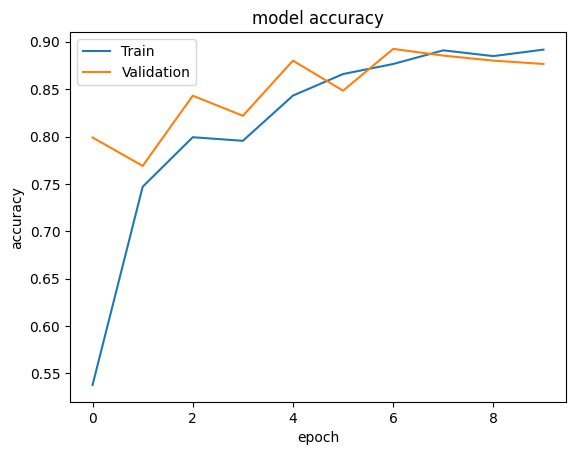

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resnet152v2_without_data_augmentation_accuracy.png")
plt.show()

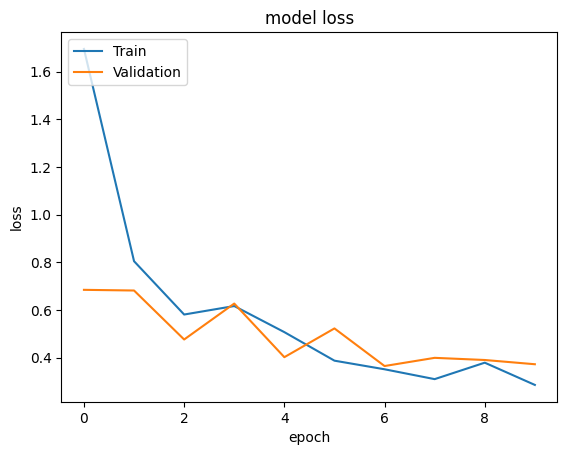

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("resnet152v2_without_data_augmentation_loss.png")
plt.show()

In [ ]:
model_2.save("3resnet152v2_without_data_augumentation.h5")

In [ ]:
import os

# Define the folder where you want to save the model
save_dir = "/content/drive/MyDrive/bone fracture detection1/models"

# Create the folder if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model to the specified folder
model_path = os.path.join(save_dir, "3resnet152v2_without_data_augumentation.h5")
model_2.save(model_path)


## InceptionResNetV2

In [ ]:
inception_resnetv2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3),
    pooling="avg",
    classes=6,
)

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
for layer in inception_resnetv2.layers:
  layer.trainable = False

In [ ]:
model_3 = tf.keras.models.Sequential()
model_3.add(inception_resnetv2)

model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dropout(0.4))
model_3.add(tf.keras.layers.Dense(256,activation="relu", kernel_initializer='he_uniform'))
model_3.add(tf.keras.layers.Dropout(0.4))
model_3.add(tf.keras.layers.Dense(6, activation="softmax"))

In [ ]:
model_3.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
history = model_3.fit(
    x_train,
    y_train,
    batch_size = 32,
    validation_data = (x_val, y_val),
    epochs = 10
)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3010 - loss: 1.9010 - val_accuracy: 0.6772 - val_loss: 0.9615
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.5682 - loss: 1.1670 - val_accuracy: 0.7178 - val_loss: 0.8107
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - accuracy: 0.6294 - loss: 1.0249 - val_accuracy: 0.7390 - val_loss: 0.7884
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 333ms/step - accuracy: 0.6614 - loss: 0.9066 - val_accuracy: 0.7443 - val_loss: 0.7243
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 334ms/step - accuracy: 0.7030 - loss: 0.8256 - val_accuracy: 0.7778 - val_loss: 0.6900
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - accuracy: 0.7232 - loss: 0.8067 - val_accuracy: 0.7672 - val_loss: 0.6288
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 331ms/step - accuracy: 0.7277 - loss: 0.7559 - val_accuracy: 0.7813 - val_loss: 0.5996
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 333ms/step - accuracy: 0.7337 - loss: 0.7337 - val_accurac

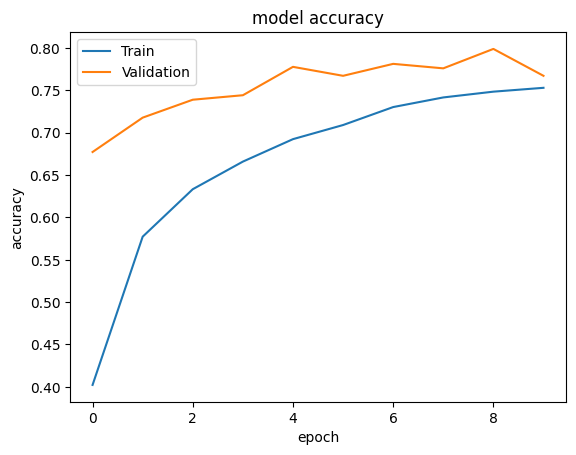

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("inception_resnet_v2_without_data_augmentation_accuracy.png")
plt.show()

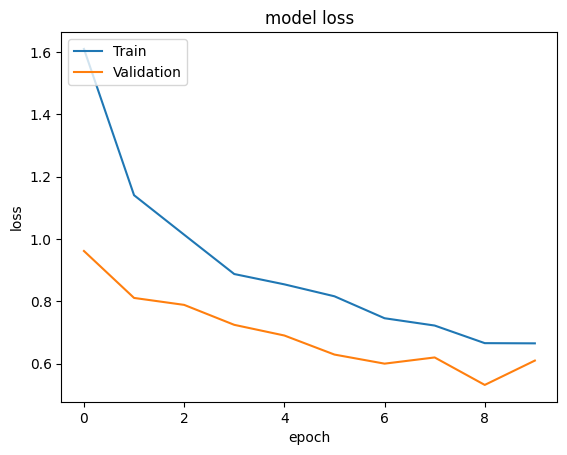

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("inception_resnet_v2_without_data_augmentation_loss.png")
plt.show()

In [ ]:
model_3.save("inception_resnetv2_without_data_augmentation.h5")

In [ ]:
import os

# Define the folder where you want to save the model
save_dir = "/content/drive/MyDrive/bone fracture detection1/models"

# Create the folder if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the model to the specified folder
model_path = os.path.join(save_dir, "inception_resnetv2_without_data_augmentation.h5")
model_3.save(model_path)


In [ ]:
del model_3
del inception_resnetv2

## Best Baseline model -> Resnet152V2

In [ ]:
model_2.evaluate(x_val, y_val)

18/18 ━━━━━━━━━━━━━━━━━━━━ 415s 23s/step - accuracy: 0.8589 - loss: 0.5027


[0.3717285990715027, 0.8765432238578796]

In [ ]:
y_pred = model_2.predict(x_val)

18/18 ━━━━━━━━━━━━━━━━━━━━ 399s 22s/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        86
           1       0.85      0.88      0.86       153
           2       0.91      0.76      0.83        83
           3       0.86      0.93      0.89        83
           4       0.97      0.93      0.95       113
           5       0.71      0.71      0.71        49

    accuracy                           0.88       567
   macro avg       0.87      0.86      0.86       567
weighted avg       0.88      0.88      0.88       567



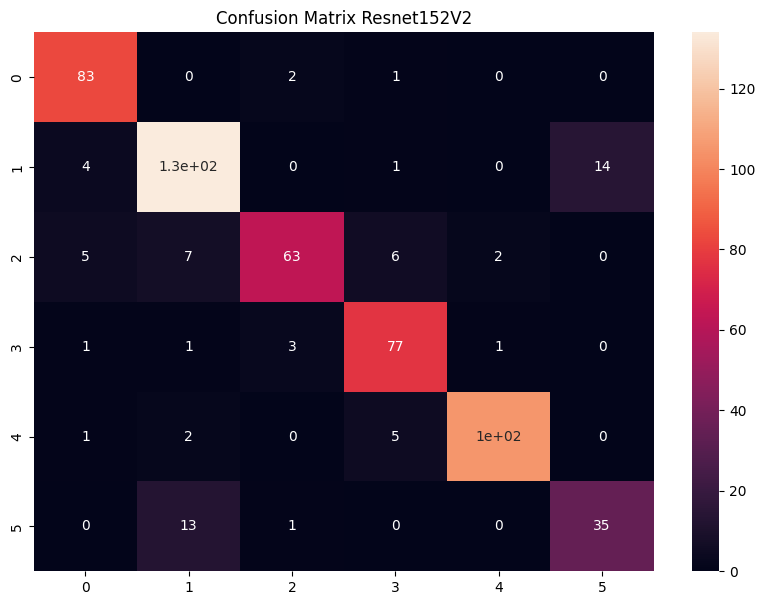

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Confusion Matrix Resnet152V2")
plt.savefig("resnet_152V2_confusion_matrix.png")
plt.show()

<ipython-input-28-2d701482324e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

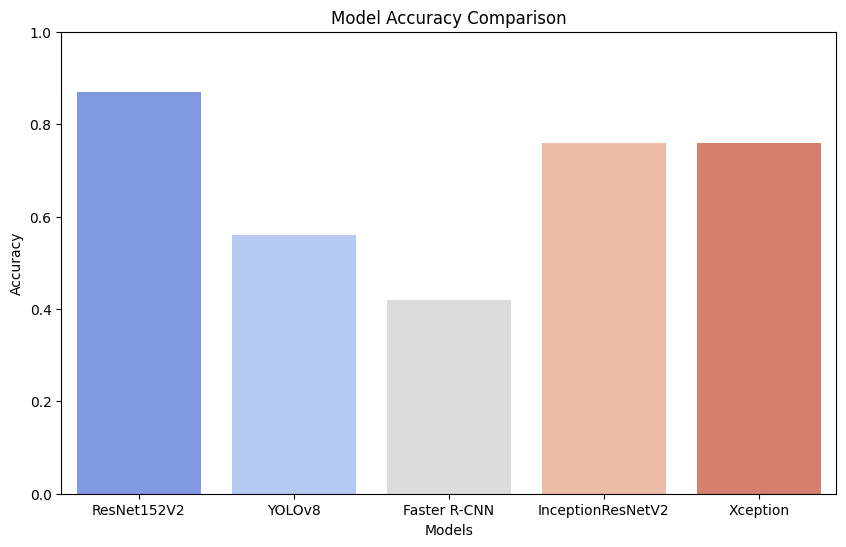

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample accuracies for different models
model_accuracy = {
    'Model': ['ResNet152V2', 'YOLOv8', 'Faster R-CNN', 'InceptionResNetV2', 'Xception'],
    'Accuracy': [0.87, 0.56, 0.42, 0.76, 0.76]  # Replace with your actual accuracies
}

# Create a DataFrame from the model accuracy data
df = pd.DataFrame(model_accuracy)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.0, 1.0)  # Adjust this based on your accuracy values
plt.show()
